In [2]:
import numpy as np
import pandas as pd

#### Import the dataset

In [8]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-10M100K/ratings.dat',sep='::', names=column_names)

C:\Users\KaranOks100\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [9]:
df.head()

,user_id,item_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [11]:
column_names = ['item_id', 'title', 'genres']
movie_titles = pd.read_csv("ml-10M100K/movies.dat",sep='::', names=column_names)
movie_titles.head()

C:\Users\KaranOks100\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,item_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Merging contents of both files using item_id

In [12]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title,genres
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,139,122,3.0,974302621,Boomerang (1992),Comedy|Romance
2,149,122,2.5,1112342322,Boomerang (1992),Comedy|Romance
3,182,122,3.0,943458784,Boomerang (1992),Comedy|Romance
4,215,122,4.5,1102493547,Boomerang (1992),Comedy|Romance


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [14]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Satan's Tango (SÃ¡tÃ¡ntangÃ³) (1994)        5.0
Shadows of Forgotten Ancestors (1964)       5.0
Blue Light, The (Das Blaue Licht) (1932)    5.0
Sun Alley (Sonnenallee) (1999)              5.0
Fighting Elegy (Kenka erejii) (1966)        5.0
Name: rating, dtype: float64

#### Here when we take mean of rating and sort them in decending order, we get a perfect rating of 5 for some movies and that is because very few users rated these movies.

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 34864
Forrest Gump (1994)                 34457
Silence of the Lambs, The (1991)    33668
Jurassic Park (1993)                32631
Shawshank Redemption, The (1994)    31126
Name: rating, dtype: int64

In [16]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",3.583333
'Round Midnight (1986),3.720000
'Til There Was You (1997),2.837748
"'burbs, The (1989)",2.969415
'night Mother (1986),3.450237


In [17]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",3.583333,6
'Round Midnight (1986),3.720000,50
'Til There Was You (1997),2.837748,302
"'burbs, The (1989)",2.969415,1504
'night Mother (1986),3.450237,211


#### Here we have a dataframe which includes average ratings and total reviews...

#### This total reviews will be useful ahead to eleminate movies with less reviews

### Visualizing The Data

<AxesSubplot:>

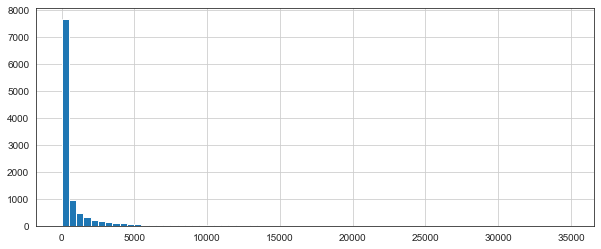

In [18]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

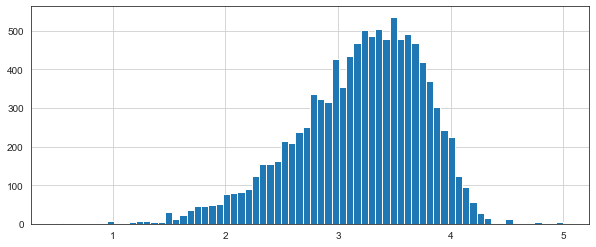

In [19]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

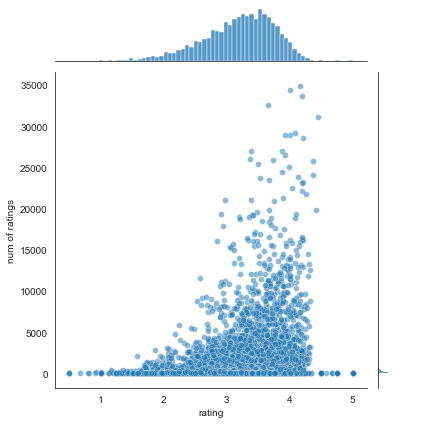

In [20]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

#### Constructing a pivot table where we have rating of each user for every movie ( ratings being the values )

#### Majority of values being NaN indicating that User didnt rate that movie

In [23]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,"""Great Performances"" Cats (1998)",'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (a.k.a. The California Dolls) (1981),...And God Created Woman (Et Dieu... crÃ©a la femme) (1956),...And God Spoke (1993),...And Justice for All (1979),...,Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),[Rec] (2007),eXistenZ (1999),ffolks (a.k.a. North Sea Hijack) (1980),loudQUIETloud: A Film About the Pixies (2006),xXx: State of the Union (2005),"Ã‚ge d'or, L' (1930)"
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Sorting the previous table based on number of reviews a movie got.

In [24]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.157426,34864
Forrest Gump (1994),4.013582,34457
"Silence of the Lambs, The (1991)",4.204200,33668
Jurassic Park (1993),3.661564,32631
"Shawshank Redemption, The (1994)",4.457238,31126
Braveheart (1995),4.082390,29154
"Fugitive, The (1993)",4.006925,28951
Terminator 2: Judgment Day (1991),3.927698,28948
Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977),4.220209,28566


#### Getting reviews of all users for a perticular movie.

In [26]:
user_movie_ratings = moviemat['Jurassic Park (1993)']
user_movie_ratings.head()

user_id
1    5.0
2    NaN
3    NaN
4    5.0
5    NaN
Name: Jurassic Park (1993), dtype: float64

#### Using the Pandas dataframe.corrwith() to compute pairwise correlation between user ratings.

In [27]:
similar_to_the_movie = moviemat.corrwith(user_movie_ratings)

C:\Users\KaranOks100\Anaconda3\envs\python36\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\KaranOks100\Anaconda3\envs\python36\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [28]:
corr_movie = pd.DataFrame(similar_to_the_movie,columns=['Correlation'])
corr_movie.dropna(inplace=True)
corr_movie.head()

,Correlation
title,
"""Great Performances"" Cats (1998)",-0.500000
'Round Midnight (1986),-0.052545
'Til There Was You (1997),0.105330
"'burbs, The (1989)",0.177193
'night Mother (1986),0.245061


In [29]:
corr_movie.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Always Tell Your Wife (1923),1.0
"Lay of the Land, The (1997)",1.0
"Challenge, The (1982)",1.0
Aleksandra (2007),1.0
"Battle of Britain, The (Why We Fight, 4) (1943)",1.0
Mass Transit (1998),1.0
Revenge of the Zombies (1943),1.0
Shanghai Express (1932),1.0
Small Cuts (Petites coupures) (2003),1.0


#### After sorting, we see that lots of movies corelate perfectly, which is not an ideal case.
#### This happens because of the the number of reviews.

In [31]:
corr_movie = corr_movie.join(ratings['num of ratings'])
corr_movie.head()

,Correlation,num of ratings
title,,
"""Great Performances"" Cats (1998)",-0.500000,6
'Round Midnight (1986),-0.052545,50
'Til There Was You (1997),0.105330,302
"'burbs, The (1989)",0.177193,1504
'night Mother (1986),0.245061,211


#### When considering those movies with more than 100 reviews (100 being an arbitary number) we get an imperessive results.

In [32]:
corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,32631
"Lost World: Jurassic Park, The (Jurassic Park 2) (1997)",0.533363,8190
Twister (1990),0.508468,216
Curious George (2006),0.483198,116
Independence Day (a.k.a. ID4) (1996),0.466925,26042


#### Summing up the steps, once we have all necessary dataframes

In [35]:
user_movie_ratings = moviemat['Back to the Future (1985)']
similar_to_the_movie = moviemat.corrwith(user_movie_ratings)
corr_movie = pd.DataFrame(similar_to_the_movie,columns=['Correlation'])
corr_movie.dropna(inplace=True)
corr_movie = corr_movie.join(ratings['num of ratings'])
corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Back to the Future (1985),1.000000,21247
Back to the Future Part II (1989),0.629880,10050
Back to the Future Part III (1990),0.578916,10513
Eight Days a Week (1997),0.508253,102
Dreamer: Inspired by a True Story (2005),0.502082,102


#### Modifing the output to look better

In [44]:
movie_you_watched = 'Fast and the Furious, The (2001)'

user_movie_ratings = moviemat[movie_you_watched]
similar_to_the_movie = moviemat.corrwith(user_movie_ratings)
corr_movie = pd.DataFrame(similar_to_the_movie,columns=['Correlation'])
corr_movie.dropna(inplace=True)
corr_movie = corr_movie.join(ratings['num of ratings'])

print("Movie you watched -> ",movie_you_watched)
print("Following are movies recommended to you :\n")
corr_movie[corr_movie['num of ratings']>150].sort_values('Correlation',ascending=False)[1:10]

Movie you watched ->  Fast and the Furious, The (2001)
Following are movies recommended to you :



,Correlation,num of ratings
title,,
2 Fast 2 Furious (2003),0.733160,1291
"Fast and the Furious: Tokyo Drift, The (2006)",0.684933,362
Big Bully (1996),0.671105,355
I Saw What You Did (1965),0.667724,304
Theodore Rex (1995),0.666628,229
"White Balloon, The (Badkonake sefid) (1995)",0.644860,368
"Brain That Wouldn't Die, The (1962)",0.624401,182
XXX (Triple X) (2002),0.618898,2270
Shadow Conspiracy (1997),0.614161,226


Here I increased number of minimum reviews to 150 from 100. Results yielded from these change were more accurate.